In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import plot_tree


# Loading data
df = pd.read_csv("/content/tae.data", header = None)

In [ ]:
df

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [ ]:
df.columns = ['NVEnglish','Instructor','Course','Semester','Class_size','Class_atr']

In [ ]:
df

,NVEnglish,Instructor,Course,Semester,Class_size,Class_atr
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [ ]:
df = df.dropna()

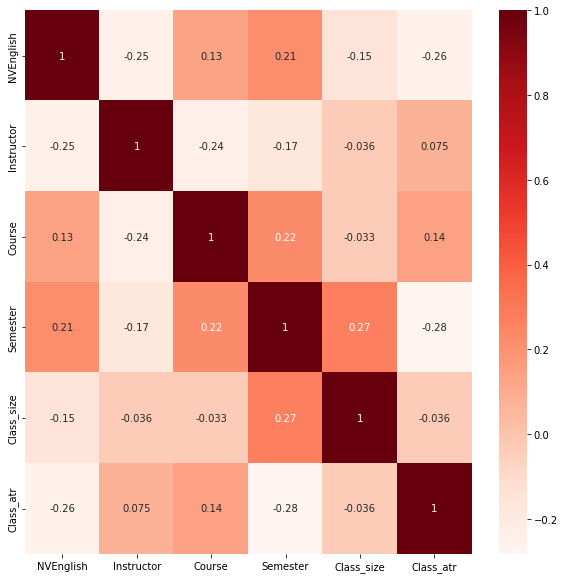

In [ ]:
plt.figure(figsize=(10,10));
sns.heatmap(df.corr(),annot=True,cmap='Reds');

In [ ]:
y = df[['Class_atr']].copy()
y.head()

,Class_atr
0,3
1,3
2,3
3,3
4,3


In [ ]:
x = df.drop(['Class_atr'],axis = 'columns')

In [ ]:
x

,NVEnglish,Instructor,Course,Semester,Class_size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
...,...,...,...,...,...
146,2,3,2,2,26
147,2,10,3,2,12
148,1,18,7,2,48
149,2,22,1,2,51


In [ ]:
y.columns

Index(['Class_atr'], dtype='object')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=347)

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predicted)*100

76.08695652173914

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[12,  2,  0],
       [ 3,  9,  1],
       [ 1,  4, 14]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=238)
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
accuracy_score(y_test,y_predicted)*100

80.43478260869566

In [ ]:
import sklearn
plt.figure(figsize=(200,100))
sklearn.tree.plot_tree(decision_tree=model, feature_names = df.columns, class_names =["low", "medium", "high"] , filled = True , precision = 4, rounded = True)
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig("tree.png",bbox_inches = "tight")

In [ ]:
test_score = model.score(X_test, y_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.5f}")

Accuracy of the DecisionTreeClassifier: 0.80435


In [ ]:
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[16  2  0]
 [ 2 12  1]
 [ 2  2  9]]
              precision    recall  f1-score   support

           1       0.80      0.89      0.84        18
           2       0.75      0.80      0.77        15
           3       0.90      0.69      0.78        13

    accuracy                           0.80        46
   macro avg       0.82      0.79      0.80        46
weighted avg       0.81      0.80      0.80        46



In [ ]:
features=list(zip(np.array(df['NVEnglish']),np.array(df['Instructor']),np.array(df['Course']),np.array(df['Semester']),np.array(df['Class_size'])))

In [ ]:
df

,NVEnglish,Instructor,Course,Semester,Class_size,Class_atr
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

[2 3 3 2 2 1 3 3 3 2 2 1 3 3 1 3 1 2 2 3 3 3 1 3 3 3 1 3 2 1 2 3 1 3 1 1 3
 1 3 3 2 1 1 1 3 2]
Accuracy: 0.5869565217391305


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[ 9  8  1]
 [ 1 13  1]
 [ 4  4  5]]
              precision    recall  f1-score   support

           1       0.64      0.50      0.56        18
           2       0.52      0.87      0.65        15
           3       0.71      0.38      0.50        13

    accuracy                           0.59        46
   macro avg       0.63      0.58      0.57        46
weighted avg       0.62      0.59      0.57        46



[0.5869565217391305, 0.45652173913043476, 0.3695652173913043, 0.30434782608695654, 0.3695652173913043, 0.3695652173913043, 0.391304347826087, 0.391304347826087, 0.3695652173913043, 0.41304347826086957, 0.3695652173913043]
Maximum accuracy: 0.5869565217391305 at K = 1


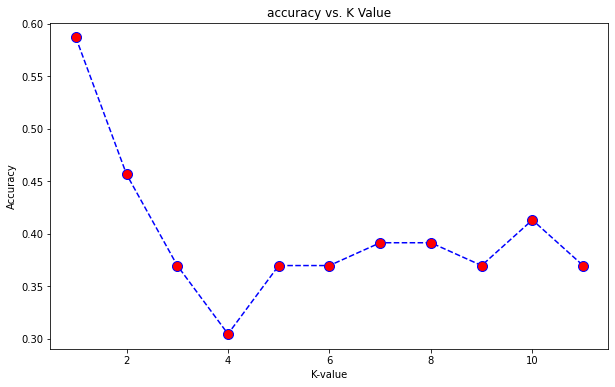

In [ ]:
acc = []
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train.values.ravel())
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

print(acc)

plt.figure(figsize=(10,6))
plt.plot(range(1,12),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)

In [ ]:
from sklearn import svm

In [ ]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train.values.ravel())
rbf_svc_y_pred = rbf_svc.predict(X_test)
print(accuracy_score(y_test,rbf_svc_y_pred)*100)
print(confusion_matrix(y_test, rbf_svc_y_pred))
print(classification_report(y_test, rbf_svc_y_pred))

34.78260869565217
[[ 1  3 14]
 [ 0  4 11]
 [ 1  1 11]]
              precision    recall  f1-score   support

           1       0.50      0.06      0.10        18
           2       0.50      0.27      0.35        15
           3       0.31      0.85      0.45        13

    accuracy                           0.35        46
   macro avg       0.44      0.39      0.30        46
weighted avg       0.45      0.35      0.28        46



In [ ]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train,y_train.values.ravel())
linear_svc_y_pred = linear_svc.predict(X_test)
print(accuracy_score(y_test,linear_svc_y_pred)*100)
print(confusion_matrix(y_test, linear_svc_y_pred))
print(classification_report(y_test, linear_svc_y_pred))

52.17391304347826
[[8 8 2]
 [3 8 4]
 [3 2 8]]
              precision    recall  f1-score   support

           1       0.57      0.44      0.50        18
           2       0.44      0.53      0.48        15
           3       0.57      0.62      0.59        13

    accuracy                           0.52        46
   macro avg       0.53      0.53      0.53        46
weighted avg       0.53      0.52      0.52        46



In [ ]:
(sum(acc))/(len(acc))

0.3992094861660079

In [ ]:
import seaborn as sns

In [ ]:
df.head()

,NVEnglish,Instructor,Course,Semester,Class_size,Class_atr
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [ ]:
#Decision Tree Sensitivity
cm1 = confusion_matrix(y_test,y_predicted)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.8888888888888888


In [ ]:
#KNN Sensitivity
cm2 = confusion_matrix(y_test,y_pred_knn)
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

Sensitivity :  0.5294117647058824


In [ ]:
# Sensitivity of Radial SVM
cm3 = confusion_matrix(y_test,rbf_svc_y_pred)
sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity3)

Sensitivity :  0.25


In [ ]:
# Sensitivity of Linear SVM
cm3 = confusion_matrix(y_test,linear_svc_y_pred)
sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity3)

Sensitivity :  0.5
